# Random Forest
-----
Random Forest is one of the most popular and most powerful machine learning algorithms. It is a type of ensemble machine learning algorithm called Bootstrap Aggregation or bagging.

-----
### Each tree is generated according to the following rules：
- 1）Specify the size of the training set of a single decision tree as N. For each tree, N training samples are drawn randomly and with release from the total training set (this sampling method is called bootstrap sample method) as the training set of the tree.
- 2）If the feature dimension of each sample is M, specify a constant m<<M, randomly select a subset of m features from the M features, and choose the optimal one from these m features each time the tree is split.
- 3）Each tree is grown to the maximum extent possible and there is no pruning process.

----
### Advantage of RandomForest
- High accuracy rates of all current algorithms.
- The ability to operate effectively on large data sets.
- The ability to handle input samples with high dimensionality and without the need for dimensionality reduction.
- The ability to evaluate the importance of individual features on the classification problem.

### Disadvantage of RandomForest
- The biggest disadvantage of random forests is its computational complexity. Random forests is very slow in making predictions because large number of decision-trees are used to make predictions. All the trees in the forest have to make a prediction for the same input and then perform voting on it. So, it is a time-consuming process.
- The model is difficult to interpret as compared to a decision-tree, where we can easily make a prediction as compared to a decision-tree.
----
## Schematic diagram

![Random Forest](https://i.ytimg.com/vi/goPiwckWE9M/maxresdefault.jpg)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
heart = pd.read_csv('heart_failure_clinical_records_dataset.csv')
heart.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


# Visualization of 2 features

You can visualize by taking any two features and plotting them along with the axes. As the target takes binary values, I have used 2 different colours to represent the values, Red for Deceased (1) and Blue for Not Deceased (0). Here I have taken Age and Number of Platelets along with Horizontal and Vertical axes respectively.

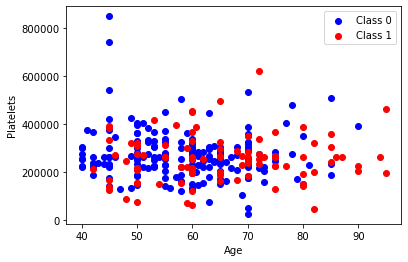

In [4]:
X_age_0 = [heart['age'][i] for i in range(len(heart)) if heart['DEATH_EVENT'][i]==0]
X_age_1 = [heart['age'][i] for i in range(len(heart)) if heart['DEATH_EVENT'][i]==1]

y_diabetes_0 = [heart['platelets'][i] for i in range(len(heart)) if heart['DEATH_EVENT'][i]==0]
y_diabetes_1 = [heart['platelets'][i] for i in range(len(heart)) if heart['DEATH_EVENT'][i]==1]

plt.scatter(X_age_0, y_diabetes_0, color='blue')
plt.scatter(X_age_1, y_diabetes_1, color='red')
plt.xlabel('Age')
plt.ylabel('Platelets')
plt.legend(['Class 0', 'Class 1'])
plt.show()

# Splitting Dataset and applying Random Forest Classifier

In this step, the dataset is split into Train set and Validation set. 70% of the instances have been used for Training and rest 30% have been used in Validation of the model. You can further split the Validation Set into Test Set and Validation Set.


In [5]:
X = np.array([heart.loc[i][:-1] for i in range(len(heart))])
y = np.array(heart['DEATH_EVENT'])

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
print(f"Train Score : {clf.score(X_train, y_train)} \t Validation Score : {clf.score(X_test, y_test)}")
print(clf.get_params())

Train Score : 1.0 	 Validation Score : 0.8555555555555555
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


# Probability of Predicted Classes

We can get the probabilities of predictions for each class. At a high level, we get the classification as the class having highest predicted probability. For example, in the first instance below, the model has predicted Class 0 to be 0.92 and Class $1$ to be 0.08, therefore the Class prediction is 0. I have used the inbuilt predict_proba() function to get the class prediction probabilities.

In [6]:
y_pred = clf.predict(X_test)
y_pred_prob = clf.predict_proba(X_test)
print(f"Predictions : {y_pred[:10]}\nPred Prob : {y_pred_prob[:10]}")

Predictions : [0 0 0 0 1 0 1 0 0 0]
Pred Prob : [[0.75 0.25]
 [0.99 0.01]
 [0.95 0.05]
 [0.92 0.08]
 [0.32 0.68]
 [0.64 0.36]
 [0.29 0.71]
 [0.64 0.36]
 [0.99 0.01]
 [0.91 0.09]]


# Computing ROC Curve and AUC Score

ROC stands Receiver Operator Characteristics** for and AUC means Area Under the Curve. Higher value of AUC means our binary classifier can efficiently distinguish between Class $0$ and Class $1$. 

Using ```Scikits-learn```'s inbuilt methods, you can obtain these easily.

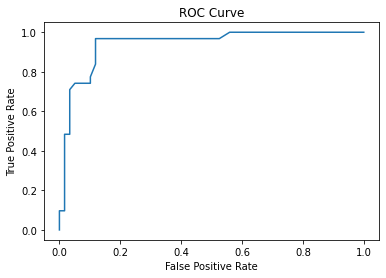

AUC Score : 0.9412247129579004


In [10]:
from sklearn.metrics import roc_auc_score, roc_curve
fpr0, tpr0, _ = roc_curve(y_test, y_pred_prob[:,1])

plt.plot(fpr0, tpr0)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

print(f"AUC Score : {roc_auc_score(y_test, y_pred_prob[:,1])}")

# Conclusion
The AUC score of RandomForest is 0.94, which prooves that it has high accuaracy